In [63]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import filters
from skimage.transform import resize
from skimage.filters import gaussian

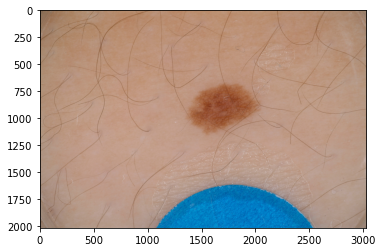

In [33]:
file_im = 'example_image/ISIC_0001769.jpg'
im = plt.imread(file_im)
plt.imshow(im)

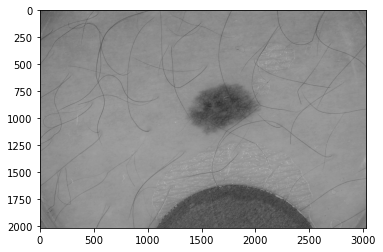

In [26]:
im2 = im[0:1500,:,:]
im2 = rgb2gray(im)*256
plt.imshow(im2, cmap='gray')

In [27]:
val = filters.threshold_otsu(im2)
print(val)

130.99889686274508


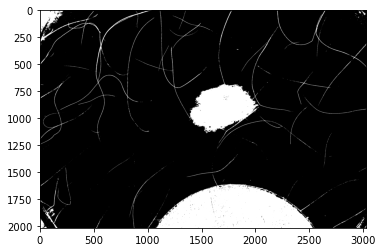

In [28]:
mask = im2 < val
plt.imshow(mask, cmap='gray')

## Morphology

[[0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]]


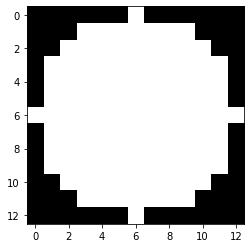

In [29]:
from skimage import morphology

# Structural element, that we will use as a "brush". The parameter is "brush side"
struct_el = morphology.disk(6)

print(struct_el)
plt.imshow(struct_el, cmap='gray')

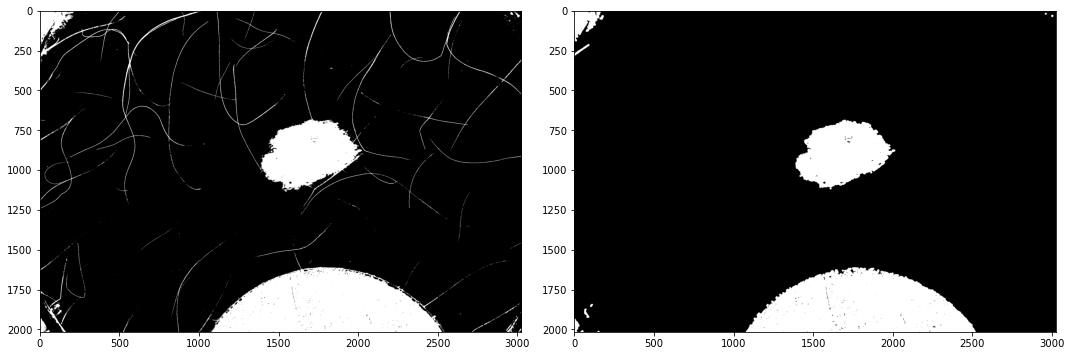

In [30]:
mask2 = morphology.binary_opening(mask, struct_el)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(mask2, cmap='gray')
fig.tight_layout()

## Segmentation via pixel classification

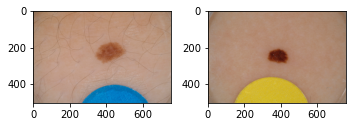

In [34]:
def prepare_im(im_id):

  im = plt.imread('example_image/' + im_id + '.jpg')
  im = resize(im, (im.shape[0] // 4, im.shape[1] // 4), anti_aliasing=True)
 
  gt = plt.imread('example_segmentation/' + im_id + '_segmentation.png')
  gt = resize(gt, (gt.shape[0] // 4, gt.shape[1] // 4), anti_aliasing=True)


  return im, gt

im1, gt1 = prepare_im('ISIC_0001769')
im2, gt2 = prepare_im('ISIC_0001852')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(im1)
axes[1].imshow(im2)
fig.tight_layout()

93.59345184445517 133.37757430410238 157.32972026842836


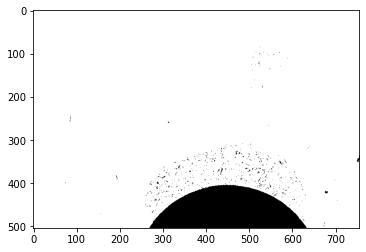

In [62]:
val0 = filters.threshold_otsu(im1[:,:,0]*256)
val1 = filters.threshold_otsu(im1[:,:,1]*256)
val2 = filters.threshold_otsu(im1[:,:,2]*256)
print(val0,val1,val2)

im1mask = (im1[:,:,2]*256<val2)
plt.imshow(im1mask, cmap='gray')